In [1]:
#Library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Upon examining the data, it has been observed that the most significant factors influencing charges are smoking status, age, and body mass index.

insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
print('Data Type and Null Value Analysis')
print(df.info(), '\n----------------------------------------------------------')

insDF = pd.DataFrame(df)
print('General Review \n', insDF.describe(), '\n----------------------------------------------------------')

Data Type and Null Value Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 
----------------------------------------------------------
General Review 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      3

         bmi
0     27.900
1     33.770
2     33.000
3     22.705
4     28.880
...      ...
1333  30.970
1334  31.920
1335  36.850
1336  25.800
1337  29.070

[1338 rows x 1 columns]
---------------------------------------------------


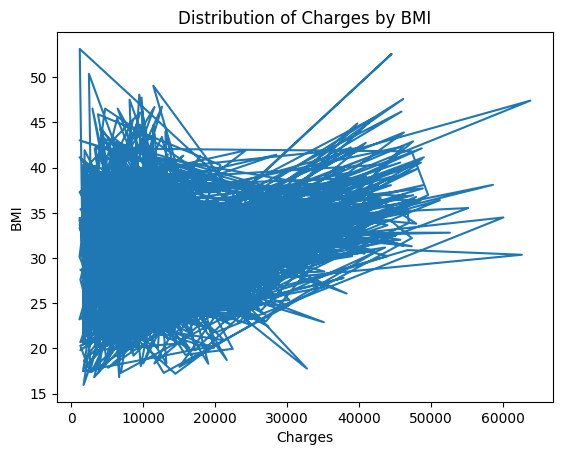

In [6]:
#Examine the distribution of Bmi (Body Mass Index)
#Examined: It was observed that BMI values were higher in the middle and advanced age group.
print(df[["bmi"]])
print('---------------------------------------------------')
plt.plot(df["charges"], df["bmi"])
plt.title("Distribution of Charges by BMI")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.show()

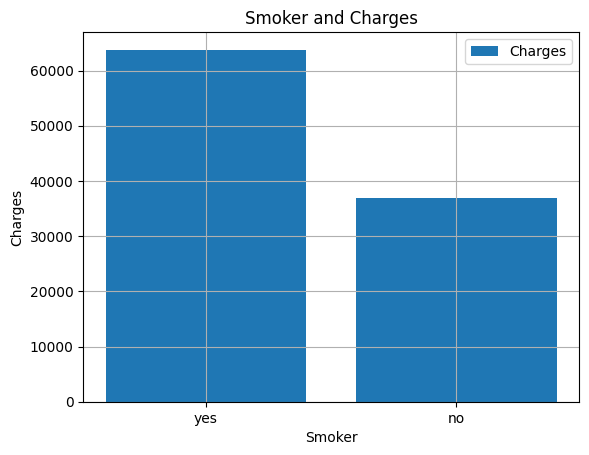

In [8]:
#Examine the relationship between “smoker” and “charges”
#Examined: It was observed that the health costs of smokers are 2 times higher than those of non-smokers.
plt.bar(df["smoker"], df["charges"], label="Charges")
plt.title("Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.legend()
plt.grid()
plt.show()

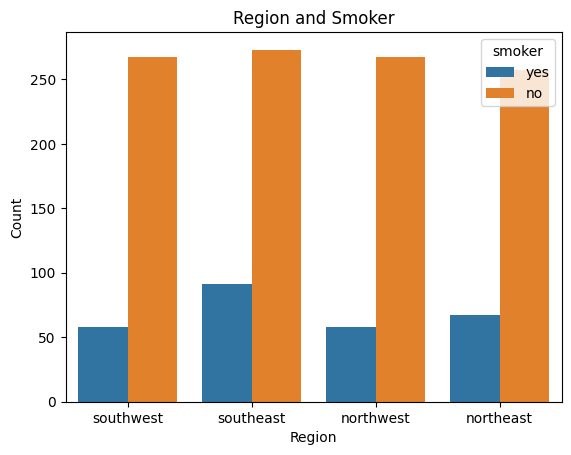

In [9]:
#Examine the relationship between “smoker” and “region”.
#Examined: A higher proportion of smokers was observed in the southeast and northeast regions.
sns.countplot(data=df, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()

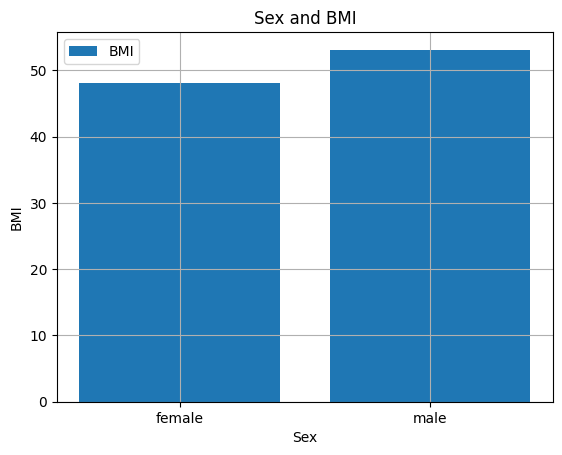

In [10]:
#Examine the relationship between “bmi” and “sex”.
#Examined: It was observed that BMI was higher in male than in female.
plt.bar(df["sex"], df["bmi"], label="BMI")
plt.title("Sex and BMI")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.legend()
plt.grid()
plt.show()

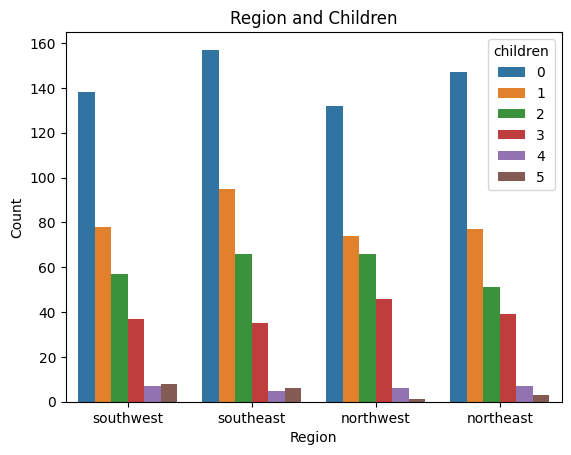

In [11]:
#Find the "region" with the most "children".
#Examined: It was observed that the most children were in the southeast region.
sns.countplot(data=df, x='region', hue='children')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Children")
plt.show()

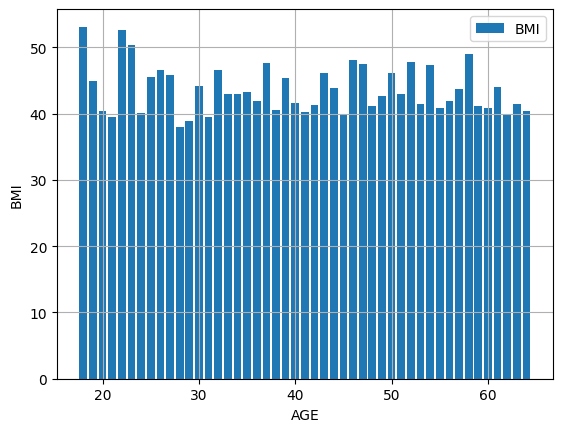

In [12]:
#Examine the relationship between “age” and “bmi”
#Examined: No consistent relationship was observed between age and BMI.
#However, it can be said that the BMI is higher for those under 28 years old and lower if they are over 58 years old.
plt.bar(df["age"], df["bmi"], label="BMI")
plt.xlabel("AGE")
plt.ylabel("BMI")
plt.legend()
plt.grid()
plt.show()

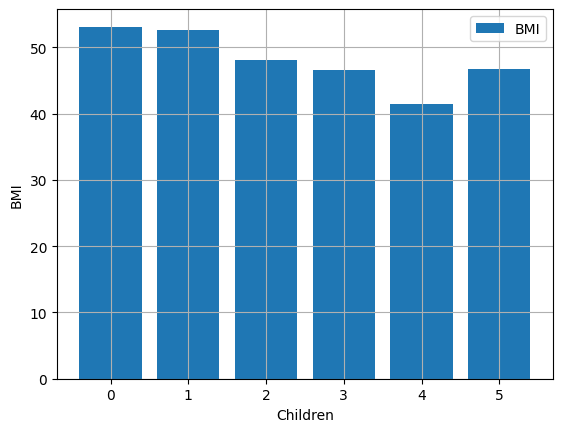

In [13]:
#Examine the relationship between “bmi” and “children”.
#Examined: It was observed that the BMI of those with fewer children was higher than those with more children.
plt.bar(df["children"], df["bmi"], label="BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='bmi'>

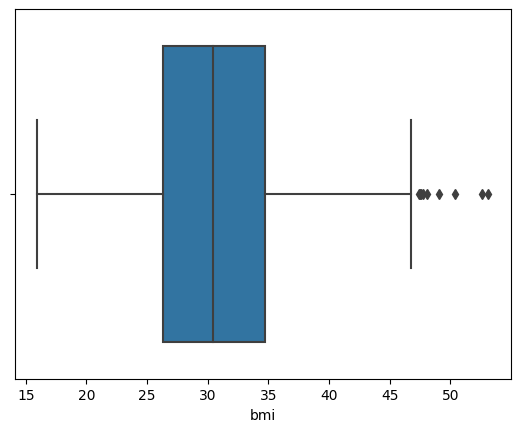

In [14]:
# Is there an outlier in the "bmi" variable? Please review.
#Examined: Outliers were found in the BMI variable.
sns.boxplot(x= "bmi", data=df)

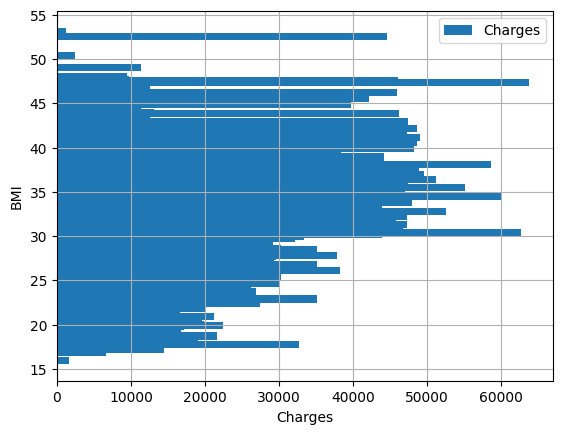

In [15]:
# Examine the relationship between “bmi” and “charges”
# Examined: It was observed that those with higher BMI had higher healthcare costs.
plt.barh(df["bmi"], df["charges"], label="Charges")
plt.ylabel("BMI")
plt.xlabel("Charges")
plt.legend()
plt.grid()
plt.show()

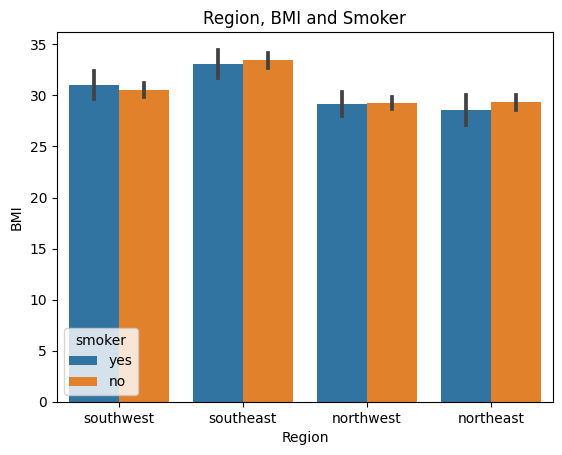

In [16]:
#  Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
# Examined: It was observed that the most smokers were in the southeast region, and people in this region had higher BMI.

sns.barplot(data=df, x="region", y="bmi", hue="smoker")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.title("Region, BMI and Smoker")
plt.show()

In [18]:
## Data Preprocessing ##
y = df['charges']
sex = df['sex']
smoker = df['smoker']
region = df['region']

X = df.drop(['charges', 'sex', 'smoker', 'region'], axis=1)

sex = pd.get_dummies(sex)
smoker = pd.get_dummies(smoker)
region = pd.get_dummies(region)

X=pd.concat([sex,smoker,region,X], axis=1)

In [26]:
#control values
X

,female,male,no,yes,northeast,northwest,southeast,southwest,age,bmi,children
0,1,0,0,1,0,0,0,1,19,27.900,0
1,0,1,1,0,0,0,1,0,18,33.770,1
2,0,1,1,0,0,0,1,0,28,33.000,3
3,0,1,1,0,0,1,0,0,33,22.705,0
4,0,1,1,0,0,1,0,0,32,28.880,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0,50,30.970,3
1334,1,0,1,0,1,0,0,0,18,31.920,0
1335,1,0,1,0,0,0,1,0,18,36.850,0
1336,1,0,1,0,0,0,0,1,21,25.800,0


In [24]:
#control values
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [28]:
# Model Selection
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2023)

In [29]:
#Hyper-parameter Optimization
# A compendium of hyperparameter values for exploration.
parameters = {
    "learning_rate" : [0.01,0.02,0.03,0.04],
    "subsample"     : [0.9, 0.5, 0.2, 0.1],
    "n_estimators"  : [100, 200, 500],
    "max_depth"     : [3, 6, 9],
    "gamma"         : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [30]:
#A GridSearchCV object
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(
    estimator = xgb_model,
    param_grid = parameters,
    scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.key()
    refit = "r2",
    cv = 5,
    n_jobs=-1,
    verbose = 4)

In [31]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2023, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [32]:
#Model Evaluation
print(GS.best_estimator_) #To obtain comprehensive details of the optimal model.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)


In [33]:
print(GS.best_params_) #Scoring based on the provided refit metric.

{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.9}


In [34]:
print(GS.error_score) #Error score

nan


In [35]:
#Created result_csv
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv")

In [36]:
#Displayed results
df_r=pd.read_csv('cv_results.csv')
df_r

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,188,0.488329,0.005474,0.006462,0.000103,0.10,0.01,3,500,0.9,...,5.359291e-03,1,-4.797924e+03,-4.262107e+03,-4.782055e+03,-4.631616e+03,-4.481405e+03,-4.591021e+03,2.005746e+02,1
1,44,0.918465,0.056679,0.013950,0.002923,0.01,0.01,3,500,0.9,...,5.359291e-03,1,-4.797924e+03,-4.262107e+03,-4.782055e+03,-4.631616e+03,-4.481405e+03,-4.591021e+03,2.005746e+02,1
2,189,0.511788,0.010871,0.006642,0.000110,0.10,0.01,3,500,0.5,...,4.284825e-03,3,-4.844961e+03,-4.267945e+03,-4.745871e+03,-4.610366e+03,-4.490355e+03,-4.591900e+03,2.016660e+02,3
3,45,0.660094,0.185162,0.007778,0.002535,0.01,0.01,3,500,0.5,...,4.284825e-03,3,-4.844961e+03,-4.267945e+03,-4.745871e+03,-4.610366e+03,-4.490355e+03,-4.591900e+03,2.016660e+02,3
4,190,0.400386,0.006403,0.006760,0.000157,0.10,0.01,3,500,0.2,...,4.304796e-03,5,-4.817100e+03,-4.286029e+03,-4.764877e+03,-4.625712e+03,-4.509366e+03,-4.600617e+03,1.906665e+02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,142,1.276806,0.349741,0.014014,0.001061,0.01,1.00,9,500,0.2,...,4.941955e+16,283,-7.074129e+11,-3.593544e+12,-1.546575e+12,-4.313958e+12,-1.921338e+12,-2.416566e+12,1.334819e+12,283
284,131,0.639547,0.012394,0.009362,0.000131,0.01,1.00,6,500,0.1,...,3.195381e+24,285,-3.653435e+16,-2.937419e+16,-1.362145e+16,-9.790137e+15,-9.790480e+15,-1.982212e+16,1.104775e+16,285
285,275,0.636329,0.010844,0.009464,0.000187,0.10,1.00,6,500,0.1,...,3.195381e+24,285,-3.653435e+16,-2.937419e+16,-1.362145e+16,-9.790137e+15,-9.790480e+15,-1.982212e+16,1.104775e+16,285
286,143,1.525546,0.158190,0.024747,0.005049,0.01,1.00,9,500,0.1,...,1.751437e+28,287,-3.136154e+18,-3.796368e+18,-3.346847e+18,-3.323751e+18,-3.066071e+18,-3.333838e+18,2.549443e+17,287
